In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("bank_customer_retention_prediction.ipynb")

## Week 6 - Bank Customer Retention Prediction

In this assignment, you will build a Machine Learning model to predict whether a bank customer is likely to CHURN (i.e., exit) or not based on various features such as credit score, age, tenure, and more. 

The dataset contains information about the customers, including their demographics, banking behaviors, and whether they have exited the bank (the label to be predicted).. 


In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

%matplotlib inline
import otter
grader = otter.Notebook()

**Question 1:** Load the bank customer retention dataset into a variable called `customer_retention_df`. Next, write a function called `check_data` to check if the data has been loaded successfully.

**Question 1.1:** Remove the `RowNumber` column. Then, explore the dataset to understand the features, data types, and potential missing values.

In [6]:
# load the customer retention dataset
customer_retention_df = pd.read_csv('./bank_customer_retention_prediction.csv')

# write a function called `check_data` to check data loading is successful
def check_data():
    if customer_retention_df.empty != True:
        return True
    else:
        return "Data loading unsuccessful"

# remove the RowNumber column
customer_retention_df.drop('RowNumber',axis=1, inplace=True)
customer_retention_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Question 2:** Preprocess the data by handling missing values, converting categorical variables, and scaling numerical features (if needed).

**Note**: assign your final preprocessed dataset to a variable called `processed_customer_retention_df`. Failure to do this might result in you not getting a score for this question.


In [7]:
# convert categorical feature (i.e., Gender) using OneHot encoder
encoded_customer_retention_df = pd.get_dummies(customer_retention_df, columns=["Gender","Geography"])

# preprocess data
processed_customer_retention_df = encoded_customer_retention_df
# encoded_customer_retention_df
processed_customer_retention_df.dtypes

CustomerId             int64
Surname               object
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Gender_Female           bool
Gender_Male             bool
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

**Question 3:** Split your processed dataset into training and testing set by using `80:20` splitting ratio. You can use **X** and **y** variable to store your splitted dataset.

**Question 3.1:** Train an ML model using `LogisticRegression` to predict customer churn/retention. 

**Note**: Assign your model to a variable called `customer_retention_model`. Failure to do this might result in you not getting a score for this question.

In [8]:
processed_customer_retention_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [9]:
# Prepare the data for training

# Independent variables (features)
X = processed_customer_retention_df[['CreditScore', 'Age', 'Tenure', 'Balance',
                                      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                                      'EstimatedSalary', 'Gender_Female', 'Gender_Male',
                                      'Geography_France', 'Geography_Germany', 'Geography_Spain']]

# Dependent variable (target)
y = processed_customer_retention_df['Exited']

# split your dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
customer_retention_model = LogisticRegression(random_state=42)
customer_retention_model.fit(X_train, y_train)



LogisticRegression(random_state=42)

**Question 4:** Predict using the developed model and evaluate the model using acuracy. The evaluation is already completed for you.

**Note**: Assign your prediction to a variable called `prediction`. Failure to do this might result in you not getting a score for this question.

In [10]:
# predict using the model
prediction = customer_retention_model.predict(X_test)

# evaluate the model using accuracy
accuracy = customer_retention_model.score(X_test, y_test)

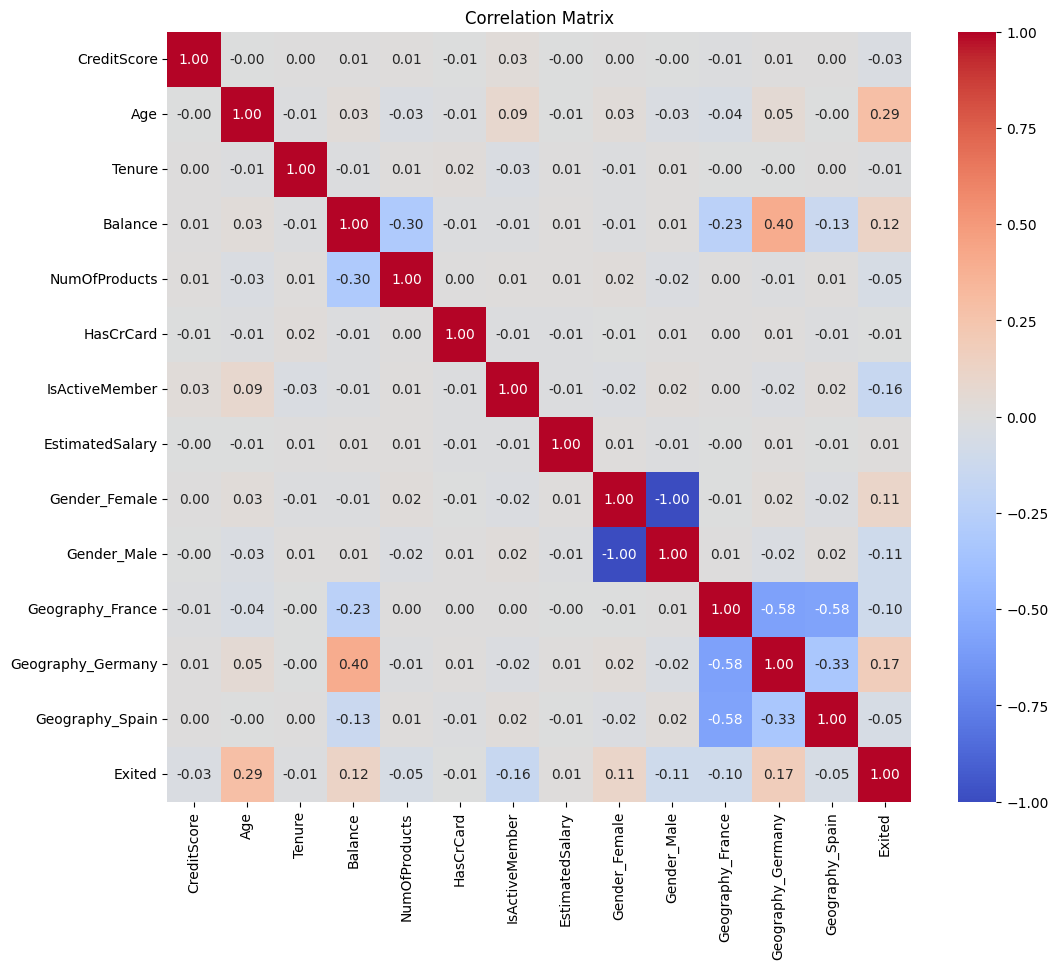

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# features for correlation analysis
features_for_correlation = ['CreditScore', 'Age', 'Tenure', 'Balance',
                             'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                             'EstimatedSalary', 'Gender_Female', 'Gender_Male',
                             'Geography_France', 'Geography_Germany', 'Geography_Spain','Exited']

# Extract the subset of the dataframe
subset_df = processed_customer_retention_df[features_for_correlation]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<!-- BEGIN QUESTION -->

**Question 5:** What insight can you derive from this data?

**From this data:**

Age and Exited (R-squared: 0.29):
There is a moderate positive linear relationship between age and the likelihood of customer churn. As age increases, the probability of churn tends to increase.

Balance and Exited (R-squared: 0.12):
There is a weak positive linear relationship between the account balance and the likelihood of customer churn. Higher balances may be associated with a slightly higher probability of churn.

IsActiveMember and Exited (R-squared: -0.16):
There is a moderate negative linear relationship between being an active member and the likelihood of customer churn. Inactive members are more likely to churn compared to active members.

Gender_Female and Exited (R-squared: 0.11):
There is a weak positive linear relationship between being female and the likelihood of customer churn. Female customers may have a slightly higher probability of churn.

Gender_Male and Exited (R-squared: -0.11):
There is a weak negative linear relationship between being male and the likelihood of customer churn. Male customers may have a slightly lower probability of churn.

Geography_Germany and Exited (R-squared: 0.17):
There is a moderate positive linear relationship between being located in Germany and the likelihood of customer churn. Customers from Germany may have a higher probability of churn compared to other geographies.

Geography_Spain and Exited (R-squared: -0.05):
There is a weak negative linear relationship between being located in Spain and the likelihood of customer churn. Customers from Spain may have a slightly lower probability of churn.

Geography_France and Exited (R-squared: -0.10):
There is a weak negative linear relationship between being located in France and the likelihood of customer churn. Customers from France may have a slightly lower probability of churn.

HasCrCard and Exited (R-squared: -0.01):
There is a very weak negative linear relationship between having a credit card and the likelihood of customer churn. Having a credit card doesn't seem to have a significant impact on churn.

**Geography and Balance:**

Germany (R-squared: 0.40): There is a strong positive linear relationship between being located in Germany and account balance. Customers in Germany tend to have higher account balances compared to other geographies.
Spain (R-squared: -0.13): There is a weak negative linear relationship between being located in Spain and account balance. Customers in Spain may have slightly lower account balances.
France (R-squared: -0.23): There is a moderate negative linear relationship between being located in France and account balance. Customers in France may have somewhat lower account balances.

**Geography, Balance, and Churn:**

Germany: Higher account balances in Germany are associated with a higher probability of churn (R-squared: 0.40). This could suggest that, despite having higher balances, customers in Germany might still be more prone to churning for other reasons.
Spain: While having slightly lower account balances in Spain (R-squared: -0.13), there is only a weak negative relationship with churn (R-squared: -0.05). The relationship is not very strong, implying that account balance might not be a significant factor in predicting churn for customers in Spain.
France: Similarly, with somewhat lower account balances in France (R-squared: -0.23), there is a weak negative relationship with churn (R-squared: -0.10). Again, account balance alone may not be a major predictor of churn for customers in France.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [12]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html